In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse,accuracy_score as ac
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report
from sklearn import svm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

data = pd.read_csv('/content/drive/My Drive/ML/pima indian diabetes.csv')
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isna().sum().sum()

0

In [7]:
print('LOGISTIC REGRESSION')

LOGISTIC REGRESSION


In [8]:
data.shape

(768, 9)

In [9]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
X=data.drop(columns='Outcome')
y=data['Outcome']

In [11]:
X.shape,y.shape

((768, 8), (768,))

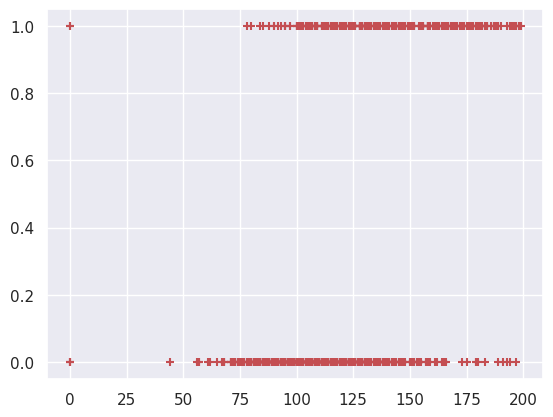

In [12]:
plt.scatter(X.iloc[:,1:2],y,marker="+", color="r")

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20,stratify=y)

In [14]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [15]:
lreg=LogisticRegression()
lreg.fit(X_train,y_train)
lreg.predict(X_test)
y_train_pred=lreg.predict(X_train)
y_test_pred=lreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
print("Accuracy scores of Training dataset : {}" ,format(lreg.score(X_train,y_train)))
print("Accuracy scores of Testing dataset : {}" ,format(lreg.score(X_test,y_test)))

Accuracy scores of Training dataset : {} 0.7752442996742671
Accuracy scores of Testing dataset : {} 0.8051948051948052


In [17]:
from sklearn.metrics import confusion_matrix
matrix =confusion_matrix(y_test,y_test_pred)
matrix

array([[93,  7],
       [23, 31]])

Text(46.25, 0.5, 'Truth')

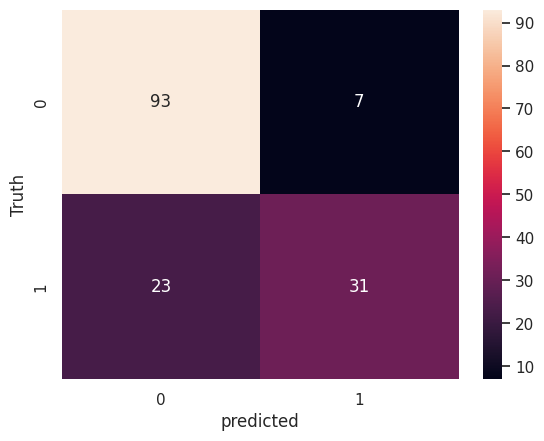

In [18]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(matrix,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [19]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,precision_score,f1_score,recall_score

In [20]:
accuracy=accuracy_score(y_test,y_test_pred)

In [21]:
pd.DataFrame({'Logistic Regression Metrics': [accuracy]}, index=['accuracy'])

,Logistic Regression Metrics
accuracy,0.805195


In [22]:
print('KNN CLASSIFIER')

KNN CLASSIFIER


In [23]:
X = data.iloc[:, [1,2,3,4,5,6,7,8]].values
y = data.iloc[:, -1].values

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred = classifier.predict(X_test)

In [28]:
#pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred})

In [29]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,precision_score,f1_score,recall_score

In [30]:
accuracy=accuracy_score(y_test,y_pred)
#recall=recall_score(y_test,y_pred, average="binary", pos_label="Mine")
#precision=precision_score(y_test,y_pred, average="binary", pos_label="Mine")
#f1=f1_score(y_test,y_pred, average="binary", pos_label="Mine")

In [31]:
#pd.DataFrame({'KNN Metrics': [accuracy, recall, precision,f1]}, index=['accuracy', 'recall', 'precision','f1'])
pd.DataFrame({'KNN Metrics': [accuracy]}, index=['accuracy'])

,KNN Metrics
accuracy,0.995671


In [32]:
from sklearn.metrics import confusion_matrix
matrix =confusion_matrix(y_test,y_pred)
matrix

array([[157,   0],
       [  1,  73]])

Text(46.25, 0.5, 'Truth')

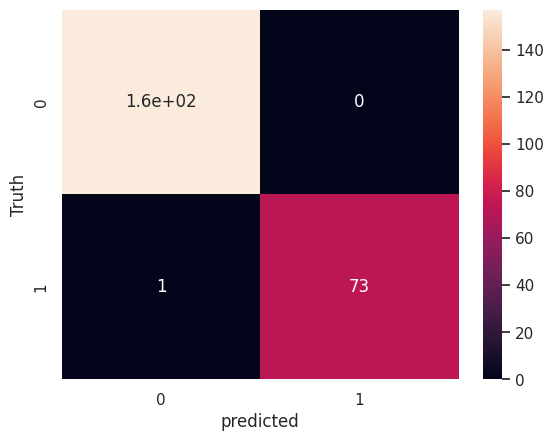

In [33]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(matrix,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [34]:
print('SVM')

SVM


In [35]:
from sklearn import svm

In [36]:
# Defining the Features and Labels

# Defining X (featues of the data)
X = data.drop(columns='Outcome', axis=1)

# Defining y (Labels )
y = data['Outcome'] # defining y

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Fit to data, then transform it
X = scaler.fit_transform(X)

# test_size represents the proportion of the dataset to include in the test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Print the shapes of the X, X_train and X_test
print("X shape is :", X.shape)
print("X_train shape is:",  X_train.shape)
print("X_test shape is:", X_test.shape)

X shape is : (768, 8)
X_train shape is: (514, 8)
X_test shape is: (254, 8)


In [37]:
model = svm.SVC(decision_function_shape='ovr')
model.fit(X_train, y_train)

SVC()

In [38]:
y_train_predict=model.predict(X_train)
y_test_predict=model.predict(X_test)
print("Accuracy_Score :",accuracy_score(y_train,y_train_predict))
print("Confusion_Matrix\n")
print(confusion_matrix(y_test,y_test_predict))

Accuracy_Score : 0.8365758754863813
Confusion_Matrix

[[142  26]
 [ 36  50]]


In [39]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,precision_score,f1_score,recall_score

In [40]:
accuracy=accuracy_score(y_test,y_test_predict)

In [41]:
#pd.DataFrame({'SVM Metrics': [accuracy, recall, precision,f1]}, index=['accuracy', 'recall', 'precision','f1'])
pd.DataFrame({'SVM Metrics': [accuracy]}, index=['accuracy'])

,SVM Metrics
accuracy,0.755906


Text(46.25, 0.5, 'Truth')

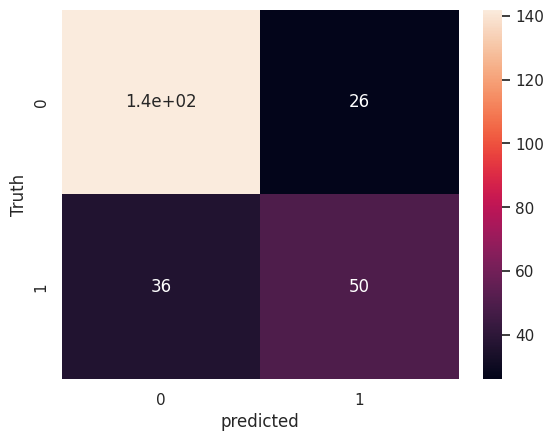

In [42]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(confusion_matrix(y_test,y_test_predict),annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [43]:
print("Random forest Algorithm")

Random forest Algorithm


In [44]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7519685039370079

In [46]:
y_predicted = model.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
cm = confusion_matrix(y_test,y_predicted)
print(cm)

[[139  29]
 [ 34  52]]


In [49]:
accuracy=accuracy_score(y_test,y_predicted)

In [50]:
#pd.DataFrame({'Random Forest Metrics': [accuracy, recall, precision,f1]}, index=['accuracy', 'recall', 'precision','f1'])
pd.DataFrame({'Random forest Metrics': [accuracy]}, index=['accuracy'])

,Random forest Metrics
accuracy,0.751969


Text(46.25, 0.5, 'Truth')

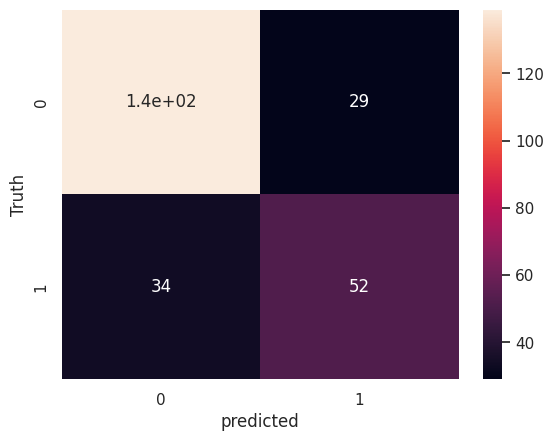

In [51]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [52]:
print("neural networks")

neural networks


In [53]:
from __future__ import absolute_import, division, print_function  # Python 2/3 compatibility

import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline
import keras; print(keras.__version__)

2.13.1


In [54]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [55]:
X = data.iloc[:, :-1].values
y = data["Outcome"].values

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

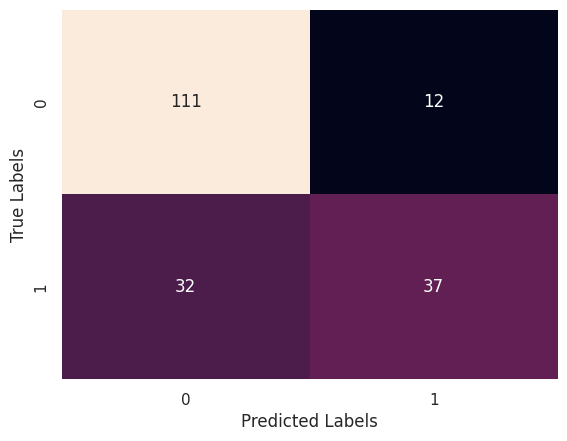

0.7708333333333334
Precision: {Accuracy: {ac_score:.2f}


In [57]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[
#     ('LR', LogisticRegression(max_iter=500, C=100)),
    ('SVC', SVC(C=10, kernel='rbf', gamma='scale', probability=True)),
    ('RF', RandomForestClassifier(n_estimators=350, n_jobs=4))
], voting='soft')

vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_mat, annot=True, fmt=".0f", cbar=False)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.show()

ac_score=accuracy_score(y_test,y_pred)
print(ac_score)
print('Precision: {Accuracy: {ac_score:.2f}')